In [ ]:
!pip install -r requirements.txt

# برای ران کردن این نوت بوک حتما باید فایل را دانلود کرده باشید و نوتبوک را از داخل آن ران کنید.
## اطمینان حاصل کنید که برای ران کردن این نوتبوک نوتبوک از داخل پوشه که لینک آن نسخه ارسال شده قرار داده شده بوده است اجرا می‌کنید.
<a href="https://drive.google.com/file/d/1e7ilIJhNl2ZJea0oWtn6ULPgYfbfTjyH/view?usp=sharing">link</a>



In [2]:
import codecs
import seaborn as sb
import tqdm
import json
from __future__ import unicode_literals
from hazm import *
from nltk import FreqDist
import pandas as pd
import nltk
from matplotlib import pyplot as plt
import numpy as np
normalizer = Normalizer()
stemmer = Stemmer()
lemmatizer = Lemmatizer()

def get_analysis(token, mode = 0):
    if mode == 0:
        return lemmatizer.lemmatize(token)
    if mode == 1 and mode == 10:
        return stemmer.stem(token)
    if mode == 2:
        return normalizer.normalize(token)
    if mode == 3:
        return sent_tokenize(token)
    if mode == 4:
        return word_tokenize(token)
def flatten(txt,mode = False , f = None):
    s = []
    if not mode:
        for sen in txt:
            for x in sen:
                w = x.strip()
                s.append(w)
    else:
        for sen in txt:
            for x in sen:
                w = x.strip()
                if f(w):
                    s.append(w)
    return s
def merge_stop_words(stopwL):
    res = []
    for pwl in stopwL:
        for wl in pwl:
            if wl.strip() not in res:
                res.append(wl.strip())
    return res

stopw = codecs.open('./module_data/stopwords.txt','r','utf-8').readlines()
my_own_stopw = codecs.open('./module_data/my_stopwords.txt','r','utf-8').readlines()

stopw = merge_stop_words([stopw,my_own_stopw])
stopwords = [get_analysis(x.strip()) for x in stopw ]
stopwords_dict = {x:True for x in stopwords}
source_dir = lambda name: f"./data/{name}/{name}.txt"
centry_dir = lambda num: f"./century_data/{num}.txt"
all_poets_centry = json.load(open("./data/all_poets_centries.json","r",encoding = "utf-8"))
tagger = POSTagger(model='./module_data/resources/postagger.model')

In [3]:
centries = [3,5,6,7,8,9,10,11,12,13,14]
txt_data = {}
for i in centries:
    txt =  open(centry_dir(i),"r",encoding="utf-8").readlines()
    txt_data[i] = [s.strip() for s in txt]



In [4]:
normalizer = Normalizer()
normalized = {}
for key in txt_data:
    print(key)
    normalized[key] = [get_analysis(txt.strip(),2)  for txt in tqdm.tqdm(txt_data[key])]

3


100%|██████████| 2094/2094 [00:00<00:00, 20994.23it/s]


5


100%|██████████| 289116/289116 [00:15<00:00, 19130.13it/s]


6


100%|██████████| 465129/465129 [00:29<00:00, 15670.16it/s]


7


100%|██████████| 312617/312617 [00:18<00:00, 17016.08it/s]


8


100%|██████████| 286641/286641 [00:16<00:00, 16995.36it/s]


9


100%|██████████| 125581/125581 [00:06<00:00, 18678.47it/s]


10


100%|██████████| 159995/159995 [00:09<00:00, 17381.67it/s]


11


100%|██████████| 357600/357600 [00:22<00:00, 16206.30it/s]


12


100%|██████████| 79073/79073 [00:05<00:00, 14785.52it/s]


13


100%|██████████| 252964/252964 [00:14<00:00, 17417.23it/s]


14


100%|██████████| 147474/147474 [00:07<00:00, 19607.68it/s]


In [5]:
sentence_tokenized = {}
for key in normalized:
    sentence_tokenized[key] = [get_analysis(sen,3) for sen in tqdm.tqdm(normalized[key])]
    sentence_tokenized[key] = flatten(sentence_tokenized[key])

100%|██████████| 147474/147474 [00:01<00:00, 115082.28it/s]


In [6]:
word_tokenized = {}
for key in sentence_tokenized:
    word_tokenized[key] = [get_analysis(sen,4) for sen in tqdm.tqdm(sentence_tokenized[key])]


100%|██████████| 148116/148116 [00:01<00:00, 84311.85it/s]


In [7]:
lemmatized_words = {}
for key in word_tokenized:
    lemmatized_words[key] = [[get_analysis(w.strip()) for w in sen if tagger.tag([w.strip()])[0][1] not in ["V","P"]] for sen in tqdm.tqdm(word_tokenized[key])]
    lemmatized_words[key] = flatten(lemmatized_words[key])

100%|██████████| 148116/148116 [00:22<00:00, 6576.15it/s]


In [8]:
f = lambda x : not stopwords_dict.get(x,False)
words = {}
for key in lemmatized_words:
    words[key] = [w.strip() for w in tqdm.tqdm(lemmatized_words[key])  if f(w.strip())]

100%|██████████| 777453/777453 [00:00<00:00, 1606091.18it/s]


In [9]:
dataframe = {}
freq_most = 250
for key in lemmatized_words:
    dataframe[key] = FreqDist(words[key]).most_common(freq_most)      
freq_analysis = pd.DataFrame(dataframe)
unique_most_words = {}
for col in dataframe:
    for w in dataframe[col]:
        w1,w2 = w
        size = unique_most_words.get(w1,0)
        unique_most_words[w1] = size + int(w2)
data = pd.DataFrame({"word":[key for key in unique_most_words],"freq":[unique_most_words[key] for key in unique_most_words]})
data = data.sort_values(by=['freq'],ascending=False)
print(len(data))

683


In [10]:
data.head()

,word,freq
1,جان,77725
8,دست,53927
3,چشم,50247
69,عشق,50197
0,جهان,43392


In [11]:
data.tail(10)

,word,freq
230,سپنج,5
235,قدح,5
245,صف,5
238,کاو,5
239,پیچیده,5
222,یاقوت,5
224,نهم,5
240,نادان,5
220,نیل,5
217,ملوک,5


In [12]:
freq_analysis.head()

,3,5,6,7,8,9,10,11,12,13,14
0,"(جهان, 49)","(جان, 6932)","(الله, 29867)","(جان, 15149)","(جان, 12186)","(جان, 4442)","(جان, 4635)","(چشم, 12392)","(عشق, 1955)","(جان, 6523)","(جان, 2528)"
1,"(جان, 38)","(جهان, 6858)","(جان, 18073)","(عشق, 7606)","(عشق, 7790)","(عشق, 3820)","(عشق, 3768)","(دست, 9477)","(جان, 1890)","(عشق, 5128)","(دست, 2370)"
2,"(باد, 38)","(دست, 6797)","(علی, 11719)","(دست, 7005)","(چشم, 6751)","(جام, 2896)","(غم, 3672)","(آب, 9423)","(چشم, 1741)","(دست, 5103)","(کار, 2048)"
3,"(چشم, 32)","(باد, 6602)","(دست, 9891)","(چشم, 6901)","(جهان, 6733)","(چشم, 2417)","(چشم, 3361)","(عشق, 7852)","(دست, 1660)","(چشم, 4409)","(چشم, 1851)"
4,"(آب, 31)","(شاه, 5895)","(جهان, 9529)","(آب, 5568)","(دست, 6074)","(غم, 2376)","(دست, 3352)","(صائب, 6972)","(غم, 1412)","(شاه, 3764)","(جهان, 1757)"


In [13]:
data.to_csv("unique_most_words.csv",index=False)

In [14]:
def vasf_ext(sentence):
    grammar = r"""
      NVASF: {<N|Ne><AJ>}
      NEZAF: {<N|Ne><N|Ne>}
    """
    cp = nltk.RegexpParser(grammar)
    return (cp.parse(sentence))

In [15]:
tarkibat = {}
for key in word_tokenized:
    tarkibat[key] = {}
    NVASF = []
    NEZAF = []
    for sentence in tqdm.tqdm(word_tokenized[key]):
        tree=vasf_ext(tagger.tag(sentence))
        for subtree in tree.subtrees():
            if subtree.label() == 'NVASF':
                NVASF.append(subtree.leaves())
            if subtree.label() == 'NEZAF':
                NEZAF.append(subtree.leaves())   
    tarkibat[key]["NVASF"]  = [' '.join([x[0],y[0]]) for x,y in NVASF]
    tarkibat[key]["NEZAF"] =[' '.join([x[0],y[0]]) for x,y in NEZAF]  

 67%|██████▋   | 207630/310544 [01:35<00:41, 2483.55it/s]

100%|██████████| 148116/148116 [00:59<00:00, 2473.96it/s]


In [16]:
dataframe_NEZAF = {}
freq_most = 100
for key in tarkibat:
    dataframe_NEZAF[key] = FreqDist(tarkibat[key]["NEZAF"]).most_common(freq_most)      
freq_analysis_NEZAF = pd.DataFrame(dataframe_NEZAF)
unique_most_words_NEZAF = {}
for col in dataframe_NEZAF:
    for w in dataframe_NEZAF[col]:
        w1,w2 = w
        size = unique_most_words_NEZAF.get(w1,0)
        unique_most_words_NEZAF[w1] = size + int(w2)
data_NEZAF = pd.DataFrame({"word":[key for key in unique_most_words_NEZAF],"freq":[unique_most_words_NEZAF[key] for key in unique_most_words_NEZAF]})
data_NEZAF = data_NEZAF.sort_values(by=['freq'],ascending=False)
data_NEZAF.to_csv("unique_most_NEZAF.csv",index=False)
print(len(data_NEZAF))
data_NEZAF.tail()

663


,word,freq
69,کردار سنگ,1
70,‌و سندان,1
71,سرود گویان,1
72,انس رادمردان,1
53,چه دندان,1


In [17]:
data_NEZAF.head()


,word,freq
113,خون دل,1489
195,سر زلف,1281
184,سر کوی,1066
199,رسول خدا,1050
219,خون جگر,1021


In [18]:
freq_analysis_NEZAF.head()

,3,5,6,7,8,9,10,11,12,13,14
0,"(فاخته گون, 4)","(شیخ الاسلام, 800)","(رسول خدا, 1009)","(آب حیات, 245)","(نعمت الله, 675)","(غم عشق, 100)","(آب حیات, 117)","(بوی گل, 311)","(خون دل, 91)","(سر زلف, 166)","(خون دل, 92)"
1,"(گردش خورشید, 3)","(حق تعالی, 265)","(قال ابن, 466)","(سر زلف, 174)","(ابن یمین, 489)","(ابن حسام, 97)","(خون دل, 105)","(نقش پا, 253)","(خون جگر, 59)","(روز قیامت, 161)","(خون جگر, 54)"
2,"(سرای سپنج, 3)","(استاد ابوعلی, 158)","(ابن عباس, 459)","(خون دل, 171)","(سر زلف, 419)","(خون دل, 86)","(اى موش, 102)","(خون دل, 245)","(بوی گل, 55)","(حضرت امام, 156)","(باد صبا, 42)"
3,"(نام نیک, 2)","(رحمه الله, 141)","(رسول الله, 441)","(شمس تبریزی, 163)","(سر کوی, 341)","(سر کوی, 85)","(خون جگر, 95)","(شاخ گل, 214)","(کام دل, 50)","(خون دل, 148)","(سر زلف, 34)"
4,"(عاشقان نشین, 2)","(شاه جهان, 133)","(پیر طریقت, 309)","(سر کوی, 151)","(سیف فرغانی, 333)","(خون جگر, 75)","(درد دل, 93)","(خون جگر, 204)","(شاخ گل, 43)","(السلام مروی, 127)","(علی جان, 33)"


In [19]:
dataframe_NVASF = {}
freq_most = 100
for key in tarkibat:
    dataframe_NVASF[key] = FreqDist(tarkibat[key]["NVASF"]).most_common(freq_most)      
freq_analysis_NVASF = pd.DataFrame(dataframe_NVASF)
unique_most_words_NVASF = {}
for col in dataframe_NVASF:
    for w in dataframe_NVASF[col]:
        w1,w2 = w
        size = unique_most_words_NVASF.get(w1,0)
        unique_most_words_NVASF[w1] = size + int(w2)
data_NVASF = pd.DataFrame({"word":[key for key in unique_most_words_NVASF],"freq":[unique_most_words_NVASF[key] for key in unique_most_words_NVASF]})
data_NVASF = data_NVASF.sort_values(by=['freq'],ascending=False)
data_NVASF.to_csv("unique_most_NVASF.csv",index=False)
print(len(data))
data_NVASF.tail()

683


,word,freq
16,زمین فرسوده,1
17,خون فسرده,1
18,شرنگ نوش,1
44,ایغده سری,1
46,رخ جوی,1


In [20]:
data_NVASF.head()

,word,freq
100,خدای تعالی,1887
109,چشم بد,742
108,آب روان,715
114,ماه نو,671
119,دل پر,491


In [21]:
freq_analysis_NVASF.head()

,3,5,6,7,8,9,10,11,12,13,14
0,"(گل سرخ, 6)","(خدای تعالی, 1301)","(خدای تعالی, 361)","(چشم بد, 134)","(دل خسته, 131)","(مه نو, 52)","(دل پر, 62)","(آب روان, 201)","(سرو روان, 23)","(خدای تعالی, 184)","(راه دور, 91)"
1,"(دهان پر, 3)","(حق تعالی, 301)","(الله تعالی, 241)","(آب روان, 83)","(آب روان, 117)","(عالم پر, 30)","(مه نو, 56)","(ماه نو, 200)","(دل تنگ, 21)","(ماه نو, 59)","(رنج بسیار, 81)"
2,"(عاشق کم, 2)","(خدای عزوجل, 193)","(ابو بکر, 167)","(سرو روان, 78)","(سرو روان, 106)","(ماه نو, 30)","(ماه نو, 45)","(ریگ روان, 172)","(خواب گران, 20)","(دل پر, 52)","(خواب گران, 43)"
3,"(باغ خرم, 2)","(خداوند تعالی, 185)","(حق جل, 163)","(حق تعالی, 61)","(شب تیره, 101)","(چشم بد, 27)","(بخت بد, 40)","(دولت بیدار, 164)","(آب روان, 18)","(آب روان, 50)","(شیر نر, 38)"
4,"(نبیذ روشن, 2)","(نفس کلی, 180)","(خدای عز, 155)","(دل تنگ, 56)","(گرز گران, 97)","(دل تنگ, 27)","(خداوند تعالی, 36)","(خواب گران, 161)","(چشم سیه, 18)","(خلد برین, 49)","(گل سرخ, 30)"


In [22]:

data_words = {}
for key in dataframe:
    data_words[key] = {}
def pi_plot(data,label,title):
    plt.figure(figsize =(15, 12))
    plt.title(title)
    plt.pie(data, labels = label,autopct='%1.1f%%',shadow = True,)
    plt.savefig(f'charts/{title}.png')
    plt.clf()
def type_recog(src,most_freq = None,title = "_words"):
    type_data_set = pd.read_csv(f"type_dataset/{src}.csv")
    type_data_set.head()
    types = type_data_set["type"].unique()
    all = []
    index = []
    for col in types:
        all.append(type_data_set[type_data_set["type"] == col]["freq"].sum())
        index.append(col)
    type_rec = {}
    for ind,row in type_data_set.iterrows():
        type_rec[row["word"]] = row["type"]
    pi_plot(all,index,f"all_century{title}")
    all = {}
    for key in most_freq:
        d = most_freq[key]
        data_words[key][title] = {}
        for w in d:
            w1,w2 = w
            t = type_rec.get(w1,"others")
            all[t] = all.get(t,0)+int(w2)
        
        for key2,num in all.items():
            data_words[key][title][key2] = num
        pi_plot([all[key] for key in all],[key for key in all],f"{key}{title}")


type_recog("unique_most_words",dataframe,"_words")
type_recog("unique_most_NVASF",dataframe_NVASF,"_words_NVASF")
type_recog("unique_most_NEZAF",dataframe_NEZAF,"_words_NEZAF")

/tmp/ipykernel_31718/2068455252.py:5: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize =(15, 12))


<Figure size 1080x864 with 0 Axes>

<Figure size 1080x864 with 0 Axes>

<Figure size 1080x864 with 0 Axes>

<Figure size 1080x864 with 0 Axes>

<Figure size 1080x864 with 0 Axes>

<Figure size 1080x864 with 0 Axes>

<Figure size 1080x864 with 0 Axes>

<Figure size 1080x864 with 0 Axes>

<Figure size 1080x864 with 0 Axes>

<Figure size 1080x864 with 0 Axes>

<Figure size 1080x864 with 0 Axes>

<Figure size 1080x864 with 0 Axes>

<Figure size 1080x864 with 0 Axes>

<Figure size 1080x864 with 0 Axes>

<Figure size 1080x864 with 0 Axes>

<Figure size 1080x864 with 0 Axes>

<Figure size 1080x864 with 0 Axes>

<Figure size 1080x864 with 0 Axes>

<Figure size 1080x864 with 0 Axes>

<Figure size 1080x864 with 0 Axes>

<Figure size 1080x864 with 0 Axes>

<Figure size 1080x864 with 0 Axes>

<Figure size 1080x864 with 0 Axes>

<Figure size 1080x864 with 0 Axes>

<Figure size 1080x864 with 0 Axes>

<Figure size 1080x864 with 0 Axes>

<Figure size 1080x864 with 0 Axes>

<Figure size 1080x864 with 0 Axes>

<Figure size 1080x864 with 0 Axes>

<Figure size 1080x864 with 0 Axes>

<Figure size 1080x864 with 0 Axes>

<Figure size 1080x864 with 0 Axes>

<Figure size 1080x864 with 0 Axes>

<Figure size 1080x864 with 0 Axes>

<Figure size 1080x864 with 0 Axes>

<Figure size 1080x864 with 0 Axes>

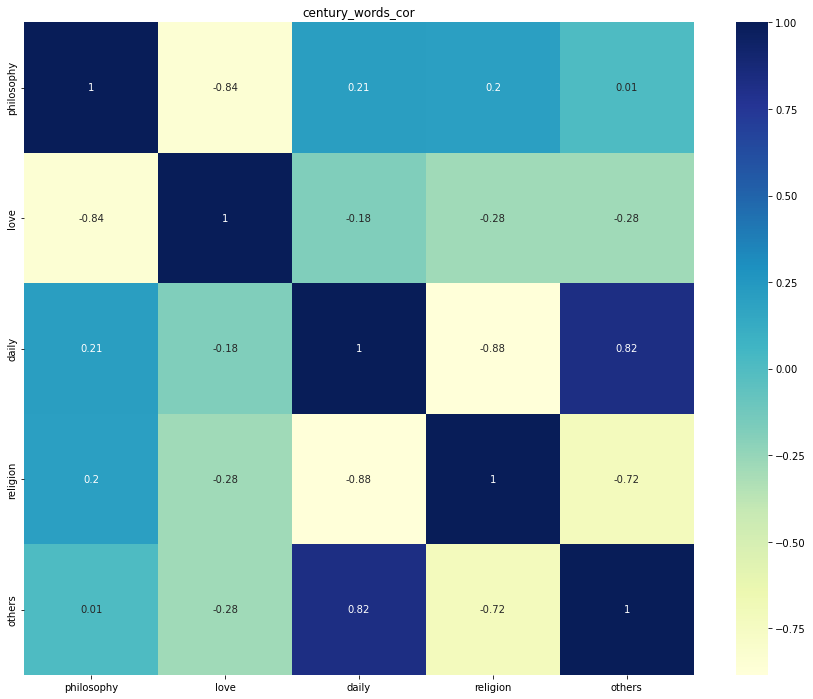

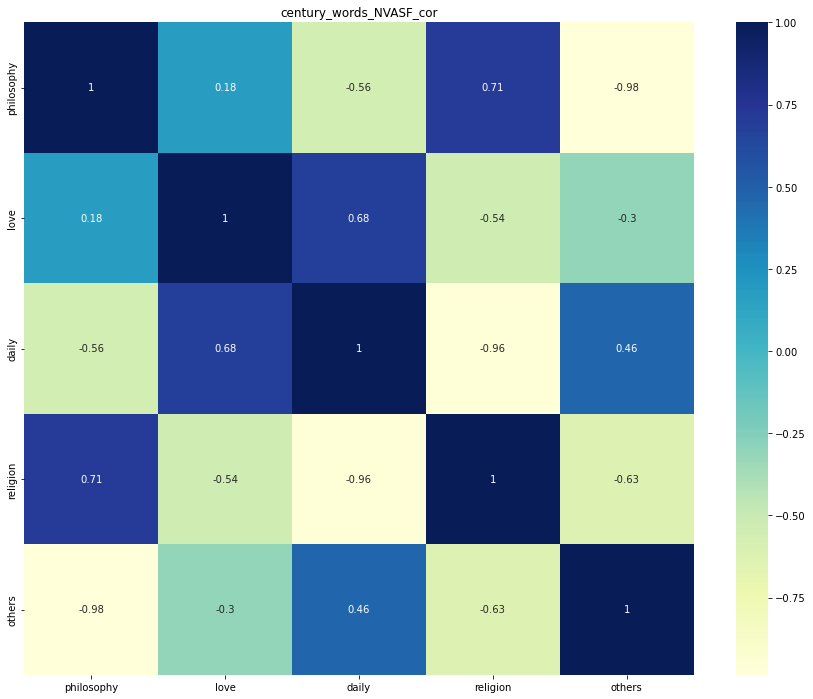

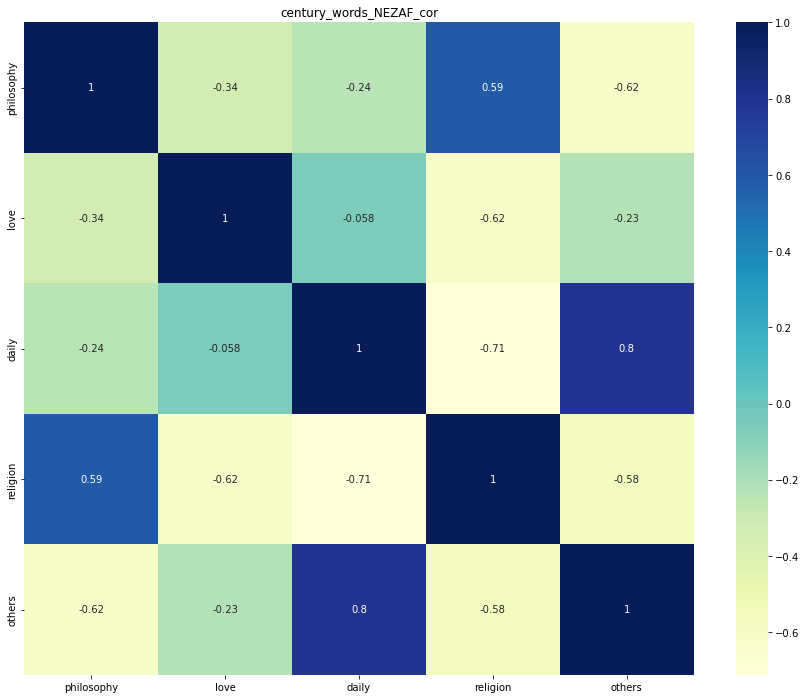

In [23]:
corr_data = {"_words":None,"_words_NVASF":None,"_words_NEZAF":None}
cols = [key for key in data_words[3]["_words"]]
index  = centries
for key in ["_words","_words_NVASF","_words_NEZAF"]:
    arr = []
    for i in index:
        arr2 = []
        for t in ["philosophy","love","daily","religion","others"]:
            arr2.append(data_words[i][key][t])
        arr2 = [a/sum(arr2) for a in arr2]
        arr.append(arr2)
    corr_data[key] = pd.DataFrame(columns=cols,index = index , data=arr)
for key in corr_data:
    plt.figure(figsize =(15, 12))
    sb.heatmap(corr_data[key].corr(), cmap="YlGnBu", annot=True)
    plt.title(f"century{key}_cor")
    plt.savefig(f"charts/century{key}_cor.png")

In [24]:


for key in ["_words","_words_NVASF","_words_NEZAF"]:
   plt.figure(figsize =(15, 12))
   for t in range(len(["philosophy","love","daily","religion","others"])):
      plt.plot(index, [corr_data[key].to_numpy()[i][t] for i in range(len(index))], '-o')
   plt.legend(["philosophy","love","daily","religion","others"])
   plt.ylabel('Percent')
   plt.xlabel('Century')
   plt.title(f"digram{key}")
   plt.savefig(f"charts/digram{key}.png")
   plt.clf()

<Figure size 1080x864 with 0 Axes>

<Figure size 1080x864 with 0 Axes>

<Figure size 1080x864 with 0 Axes>